C:\Users\mushf\AppData\Local\Temp\ipykernel_8060\1603687728.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:/DM_LAB/merged_data.csv")  # Replace "your_data.csv" with your file path


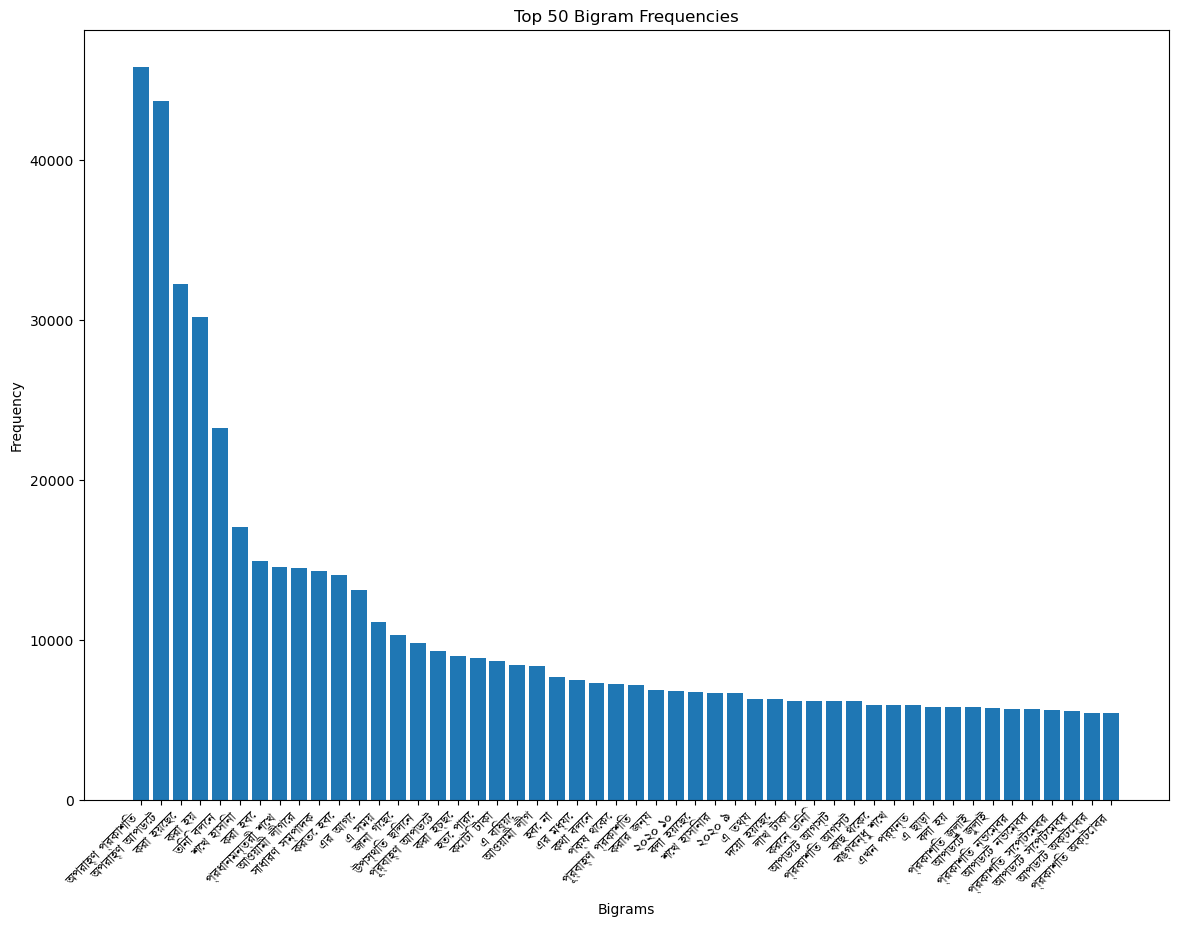

In [3]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from nltk.util import bigrams
from nltk import word_tokenize

def clean_text(text):
    cleaned_text = re.sub("[:+—–_(){}\n;|.,?’!@<>।॥“”'\"\\[\\]]", ' ', text)
    return cleaned_text

# Load CSV data into a DataFrame
data = pd.read_csv("D:/DM_LAB/merged_data.csv")  # Replace "your_data.csv" with your file path

# Extract the columns containing the text data
text_column = data['news_description']  # Replace "news_description" with the actual column name
title_column = data['news_title']  # Replace "news_title" with the actual column name
date_column = data['date']  # Replace "date" with the actual column name

# Convert non-string values to strings and clean the text
cleaned_texts = [clean_text(str(text)) for text in text_column]
cleaned_titles = [clean_text(str(title)) for title in title_column]
cleaned_dates = [clean_text(str(date)) for date in date_column]

# Combine all cleaned text data into a single string
all_text = ' '.join(cleaned_texts + cleaned_titles + cleaned_dates)

# Tokenize into words
words = all_text.split()

# Generate bigrams
bigrams_list = list(bigrams(words))

# Filter out bigrams with 'NaN' values
filtered_bigrams = [(word1, word2) for word1, word2 in bigrams_list if word1 != 'nan' and word2 != 'nan']

# Calculate bigram frequencies
bigram_freq = Counter(filtered_bigrams)

# Get the top 50 bigrams
top_bigrams = dict(sorted(bigram_freq.items(), key=lambda item: item[1], reverse=True)[:50])

# Convert tuple keys back to readable format for saving into CSV
top_bigrams_readable = {f"{bigram[0]} {bigram[1]}": count for bigram, count in top_bigrams.items()}

# Create a DataFrame from the top bigrams data
top_bigrams_df = pd.DataFrame(top_bigrams_readable.items(), columns=['Bigram', 'Frequency'])

# Specify the path to save the CSV file for top bigrams
output_csv_path = "D:/DM_LAB/top_bigrams.csv"  # Replace with your desired file path

# Save the top bigrams DataFrame to a CSV file
top_bigrams_df.to_csv(output_csv_path, index=False)

# Specify a font that supports Unicode characters
font_path = fm.findfont(fm.FontProperties(family="kalpurush"))

# Create a bar chart with the specified font and larger figsize
plt.figure(figsize=(14, 10))  # Larger figsize
plt.bar(top_bigrams_readable.keys(), top_bigrams_readable.values())
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 50 Bigram Frequencies")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontproperties=fm.FontProperties(fname=font_path))

# Specify the absolute file path to save the PNG image on your PC
output_png_path = "D:/DM_LAB/top_50_bigrams.png"  # Replace with your desired file path

# Save the bar chart as a PNG file
plt.savefig(output_png_path, format="png", bbox_inches="tight", pad_inches=0.5, dpi=300)

# Show the plot (optional)
plt.show()


In [ ]:
len(bigram_freq)

5490497